In [1]:
import torch
from torchvision import transforms
from dataset import PairedDataset
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 8

LLI_DIR_ROOT = "/Users/sinaraoufi/Desktop/Paper/LLIE/LOLdataset/our485/low"
NLI_DIR_ROOT = "/Users/sinaraoufi/Desktop/Paper/LLIE/LOLdataset/our485/high"

In [3]:
low_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
])

high_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
])

train_dataset = PairedDataset(LLI_DIR_ROOT, NLI_DIR_ROOT, low_transforms, high_transforms)
dataloader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True, num_workers = 2)

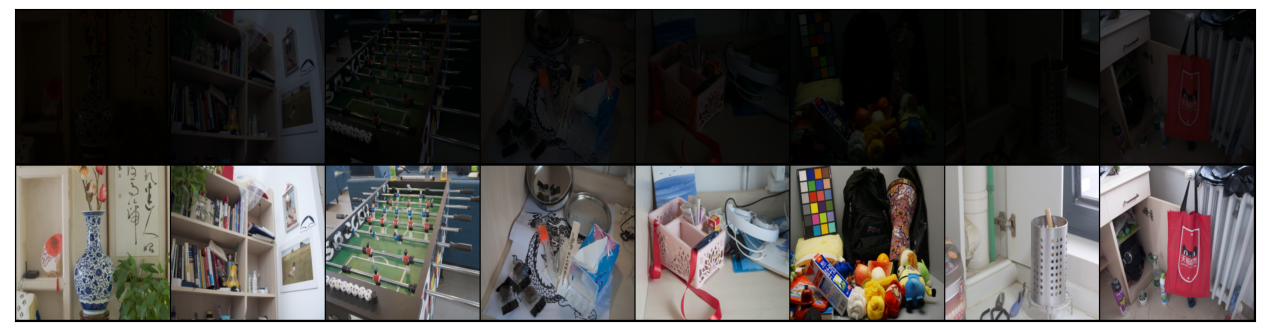

In [4]:
def grid_display(dataloader):
    """Plots a single batch of a dataloader. Denormalizes images for better visualization.

    :param dataloader: a DataLoader object that we want to display its images and labels
    """
    for images, labels in dataloader:
        fig, ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        images_grid = make_grid(images, nrow=8).permute(1,2,0)
        labels_grid = make_grid(labels, nrow=8).permute(1,2,0)
        combined_grid = torch.cat([images_grid, labels_grid], dim=0)
        ax.imshow(combined_grid)
        break
        
grid_display(dataloader)